# Imports

In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

# Read CSV

In [4]:
df = pd.read_csv('stats.csv', delimiter=';')
print(df.columns.tolist())

['Uses Octree', 'Spheres', 'Max Octree Depth', 'Num Samples', 'Max Rays Depth', 'Screen Width', 'Screen Height', 'Min', 'Max', 'Avg', 'Min FPS', 'Max FPS', 'Avg FPS']


In [5]:
# prep columns in df
df['Uses Octree'] = df['Uses Octree'].astype(int) 
df['Spheres'] = df['Spheres'].astype(int) 
df['Max Octree Depth'] = df['Max Octree Depth'].astype(int)
df['Num Samples'] = df['Num Samples'].astype(int)
df['Max Rays Depth'] = df['Max Rays Depth'].astype(int)
df['Screen Width'] = df['Screen Width'].astype(int)
df['Screen Height'] = df['Screen Height'].astype(int)
df['Min'] = df['Min'].astype(float)
df['Max'] = df['Max'].astype(float)
df['Avg'] = df['Avg'].astype(float)
df['Min FPS'] = df['Min FPS'].astype(float)
df['Max FPS'] = df['Max FPS'].astype(float)
df['Avg FPS'] = df['Avg FPS'].astype(float)

In [6]:
df_octree = df[df['Uses Octree'] == 1]
df_naive = df[df['Uses Octree'] == 0]
print(df_octree)

     Uses Octree  Spheres  Max Octree Depth  Num Samples  Max Rays Depth  \
30             1       10                 1            4               4   
31             1       10                 5            4               4   
32             1       10                10            4               4   
33             1       10                 1            4               4   
34             1       10                 5            4               4   
..           ...      ...               ...          ...             ...   
115            1     1000                 5           32              16   
116            1     1000                10           32              16   
117            1     1000                 1           32              16   
118            1     1000                 5           32              16   
119            1     1000                10           32              16   

     Screen Width  Screen Height       Min       Max       Avg    Min FPS  \
30        

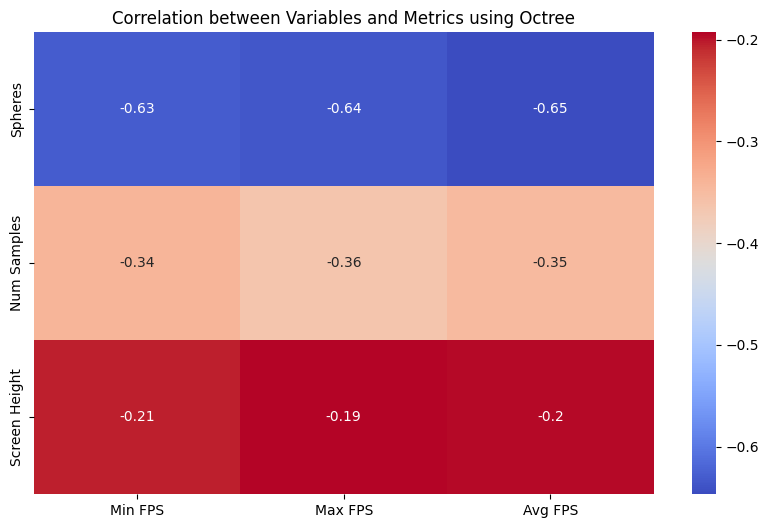

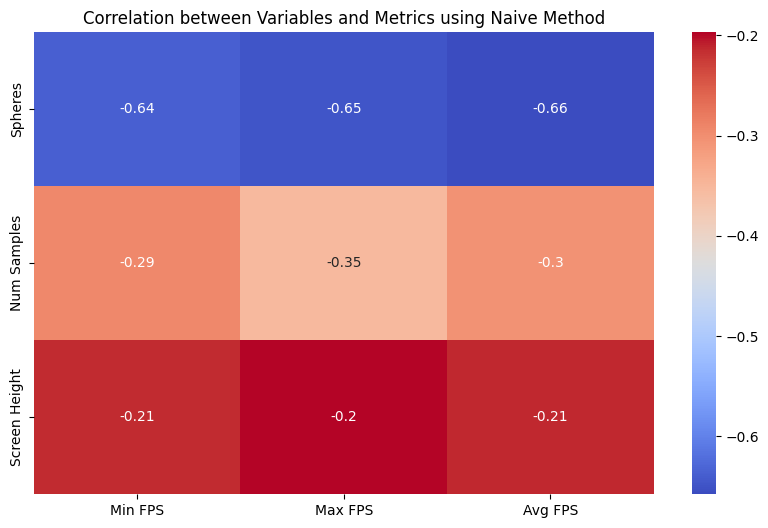

In [7]:

# Calculate the correlation matrix between the 6 variables and the 6 metrics
variables = ['Spheres', 'Num Samples', 'Screen Height']
metrics = ['Min FPS', 'Max FPS', 'Avg FPS']

correlation = df_octree[variables + metrics].corr().loc[variables, metrics]
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Metrics using Octree')
plt.show()

variables = ['Spheres', 'Num Samples', 'Screen Height']
correlation = df_naive[variables + metrics].corr().loc[variables, metrics]
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Metrics using Naive Method')
plt.show()

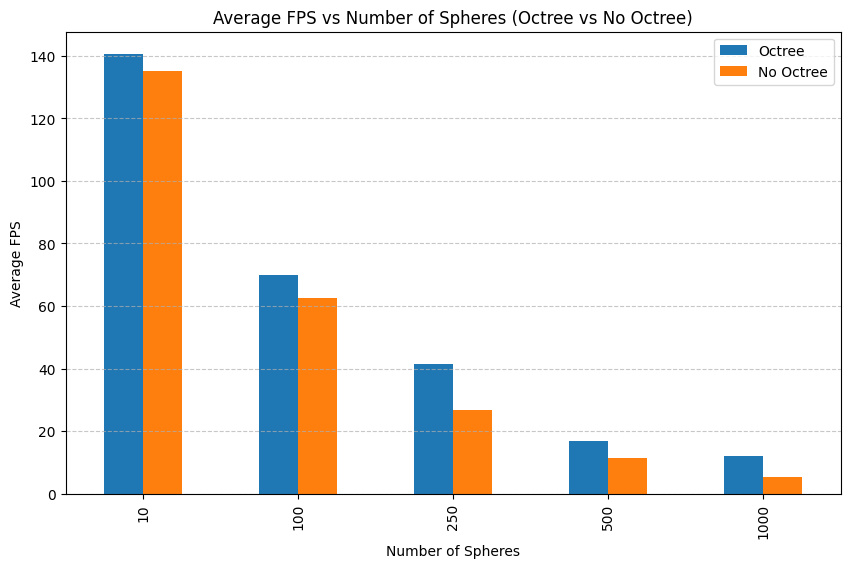

In [8]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Spheres')['Avg FPS'].mean(),
    'No Octree': df_naive.groupby('Spheres')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
# Create a new DataFrame with the avg FPS for octree and no-octree
df_octree = df[df['Uses Octree'] == 1]
df_naive = df[df['Uses Octree'] == 0]
df_octree_4 = df_octree[df_octree['Num Samples'] == 4]
df_naive_4 = df_naive[df_naive['Num Samples'] == 4]
df_octree_low = df_octree_4[df_octree_4['Max Rays Depth'] == 4]
df_naive_low = df_naive_4[df_naive_4['Max Rays Depth'] == 4]
df_octree_16 = df_octree[df_octree['Num Samples'] == 16]
df_naive_16 = df_naive[df_naive['Num Samples'] == 16]
df_octree_medium = df_octree_16[df_octree_16['Max Rays Depth'] == 8]
df_naive_medium = df_naive_16[df_naive_16['Max Rays Depth'] == 8]
df_octree_32 = df_octree[df_octree['Num Samples'] == 32]
df_naive_32 = df_naive[df_naive['Num Samples'] == 32]
df_octree_high = df_octree_32[df_octree_32['Max Rays Depth'] == 16]
df_naive_high = df_naive_32[df_naive_32['Max Rays Depth'] == 16]

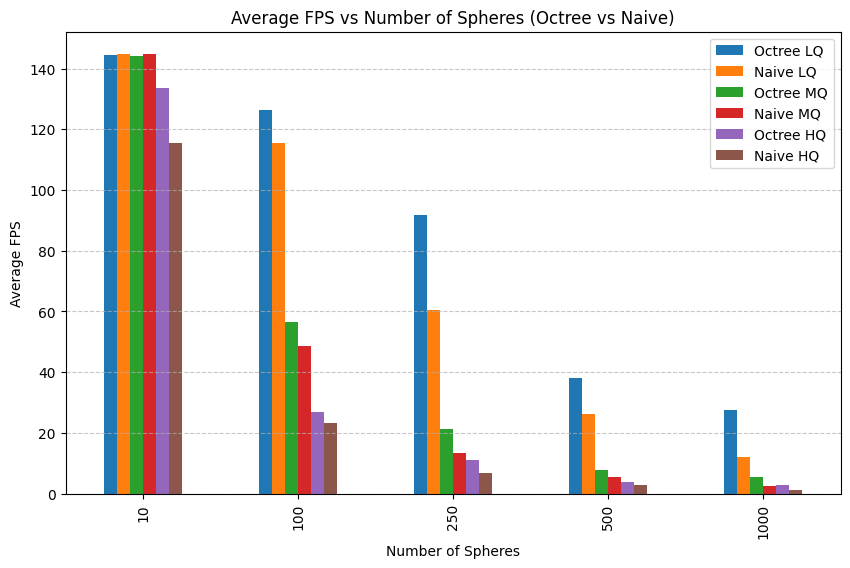

In [10]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree LQ': df_octree_low.groupby('Spheres')['Avg FPS'].mean(),
    'Naive LQ': df_naive_low.groupby('Spheres')['Avg FPS'].mean(),
    'Octree MQ': df_octree_medium.groupby('Spheres')['Avg FPS'].mean(),
    'Naive MQ': df_naive_medium.groupby('Spheres')['Avg FPS'].mean(),
    'Octree HQ': df_octree_high.groupby('Spheres')['Avg FPS'].mean(),
    'Naive HQ': df_naive_high.groupby('Spheres')['Avg FPS'].mean(),
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (Octree vs Naive)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

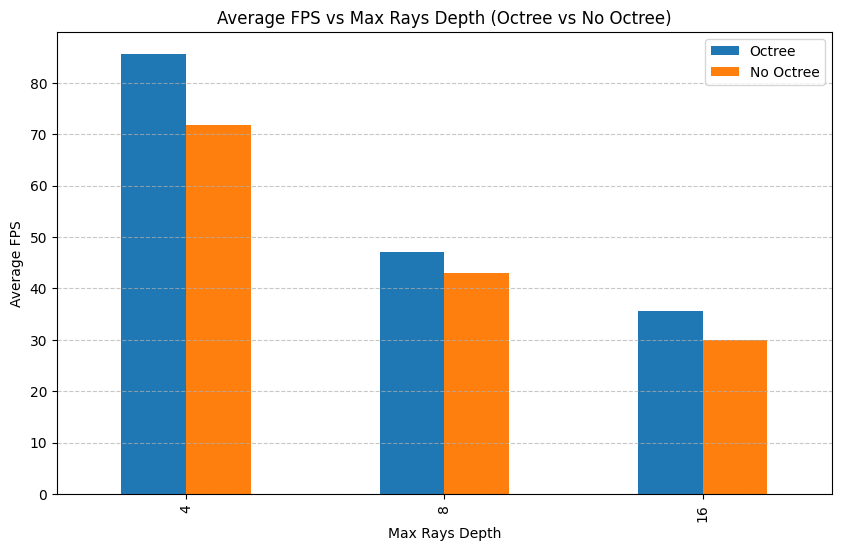

In [11]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Max Rays Depth')['Avg FPS'].mean(),
    'No Octree': df_naive.groupby('Max Rays Depth')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Max Rays Depth')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Max Rays Depth (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

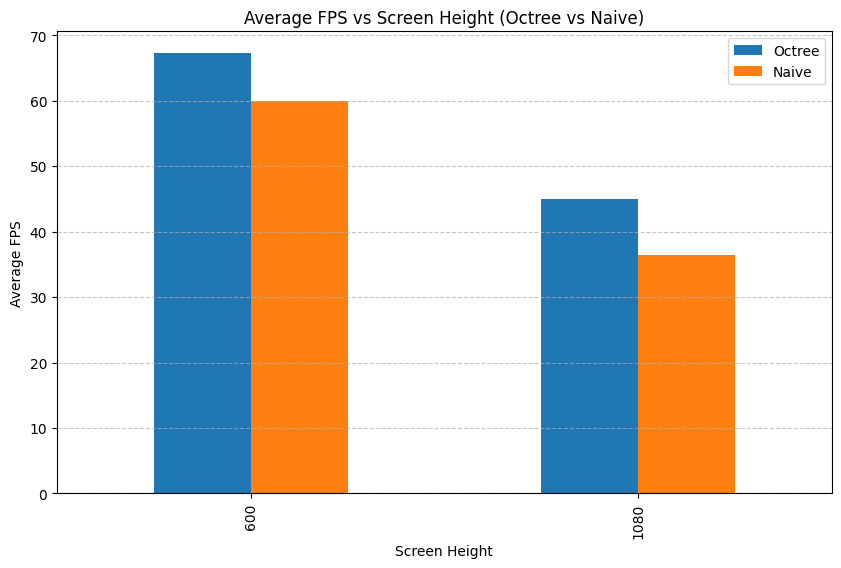

In [12]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Screen Height')['Avg FPS'].mean(),
    'Naive': df_naive.groupby('Screen Height')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Screen Height')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Screen Height (Octree vs Naive)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

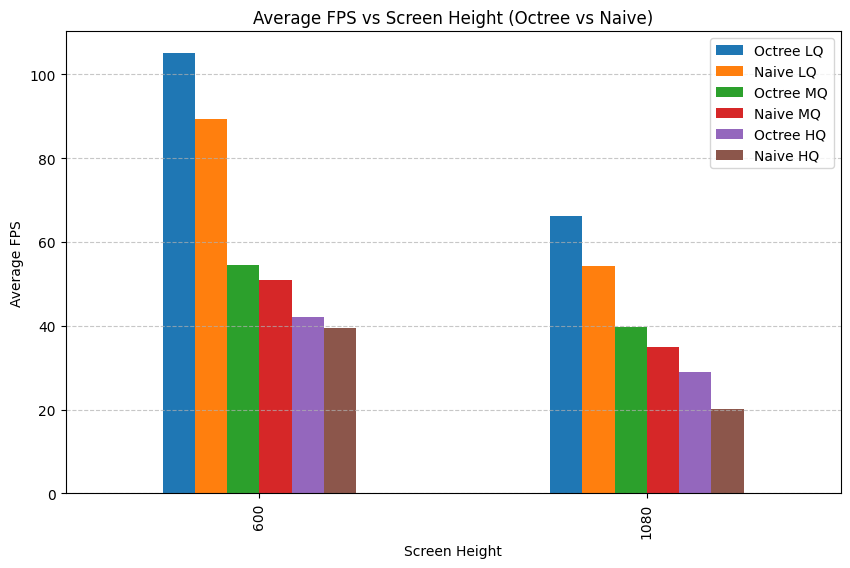

In [13]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree LQ': df_octree_low.groupby('Screen Height')['Avg FPS'].mean(),
    'Naive LQ': df_naive_low.groupby('Screen Height')['Avg FPS'].mean(),
    'Octree MQ': df_octree_medium.groupby('Screen Height')['Avg FPS'].mean(),
    'Naive MQ': df_naive_medium.groupby('Screen Height')['Avg FPS'].mean(),
    'Octree HQ': df_octree_high.groupby('Screen Height')['Avg FPS'].mean(),
    'Naive HQ': df_naive_high.groupby('Screen Height')['Avg FPS'].mean(),
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Screen Height')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Screen Height (Octree vs Naive)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

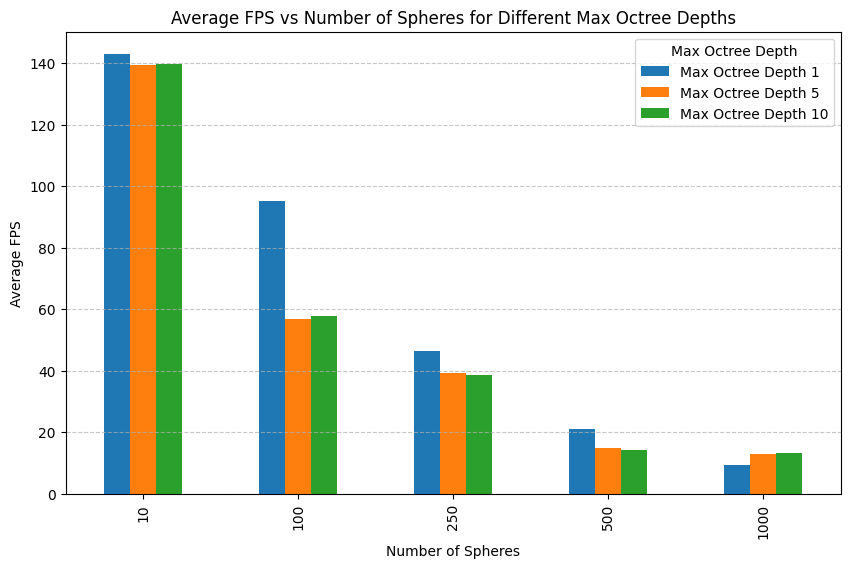

In [14]:
octree_1 = df_octree[df_octree['Max Octree Depth'] == 1]
octree_5 = df_octree[df_octree['Max Octree Depth'] == 5]
octree_10 = df_octree[df_octree['Max Octree Depth'] == 10]


octree_depths = [1, 5, 10]
avg_fps = [octree_1[octree_1['Spheres'] == spheres]['Avg FPS'].mean() for spheres in df_octree['Spheres'].unique()]
avg_fps_5 = [octree_5[octree_5['Spheres'] == spheres]['Avg FPS'].mean() for spheres in df_octree['Spheres'].unique()]
avg_fps_10 = [octree_10[octree_10['Spheres'] == spheres]['Avg FPS'].mean() for spheres in df_octree['Spheres'].unique()]
avg_fps_data = pd.DataFrame({
    'Spheres': df_octree['Spheres'].unique(),
    'Max Octree Depth 1': avg_fps,
    'Max Octree Depth 5': avg_fps_5,
    'Max Octree Depth 10': avg_fps_10
})
avg_fps_data.set_index('Spheres').plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres for Different Max Octree Depths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Max Octree Depth')
plt.show()


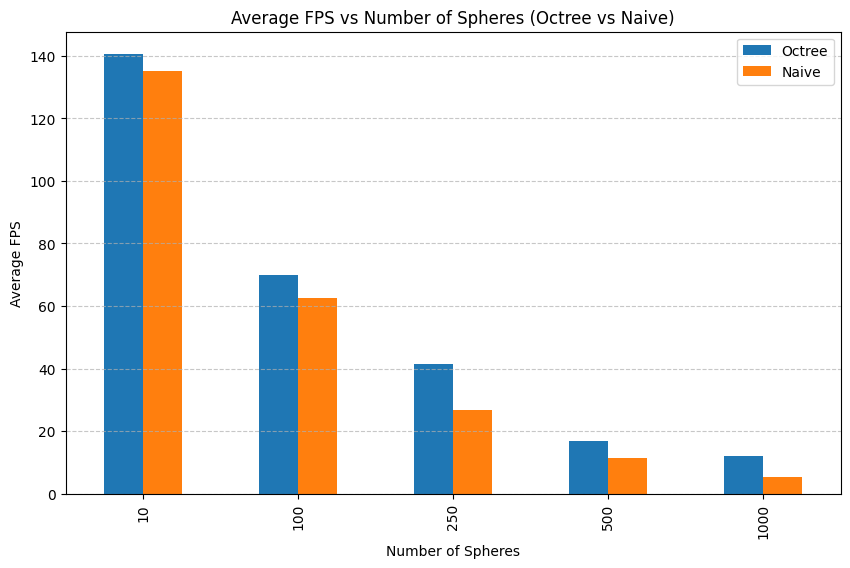

In [15]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Spheres')['Avg FPS'].mean(),
    'Naive': df_naive.groupby('Spheres')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (Octree vs Naive)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
print(df_octree['Max Octree Depth'].unique())
print(df_octree['Num Samples'].unique())
print(df_octree['Max Rays Depth'].unique())
print(df_octree['Screen Height'].unique())
naive = df_naive[df_naive['Max Octree Depth'] == -1]
naive_4 = naive[naive['Num Samples'] == 4]
naive_4_4 = naive_4[naive_4['Max Rays Depth'] == 4]
naive_4_4_600 = naive_4_4[naive_4_4['Screen Height'] == 600]
naive_4_4_1080 = naive_4_4[naive_4_4['Screen Height'] == 1080]

octree_1 = df_octree[df_octree['Max Octree Depth'] == 1]
octree_1_4 = octree_1[octree_1['Num Samples'] == 4]
octree_1_4_4 = octree_1_4[octree_1_4['Max Rays Depth'] == 4]
octree_1_4_4_600 = octree_1_4_4[octree_1_4_4['Screen Height'] == 600]

octree_1_4_4_1080 = octree_1_4_4[octree_1_4_4['Screen Height'] == 1080]


[ 1  5 10]
[ 4 16 32]
[ 4  8 16]
[ 600 1080]


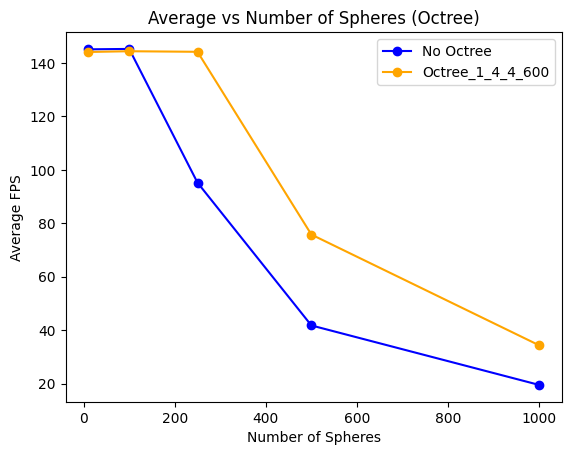

In [17]:
avg_by_spheres = naive_4_4_600.groupby('Spheres')['Avg FPS'].mean().reset_index()
avg_by_spheres_octree_1_4_4_600 = octree_1_4_4_600.groupby('Spheres')['Avg FPS'].mean().reset_index()
plt.plot(avg_by_spheres['Spheres'], avg_by_spheres['Avg FPS'], marker='o', label='No Octree', color='blue')
plt.plot(avg_by_spheres_octree_1_4_4_600['Spheres'], avg_by_spheres_octree_1_4_4_600['Avg FPS'], marker='o', label='Octree_1_4_4_600', color='orange')

plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average vs Number of Spheres (Octree)')
plt.legend()
plt.show()

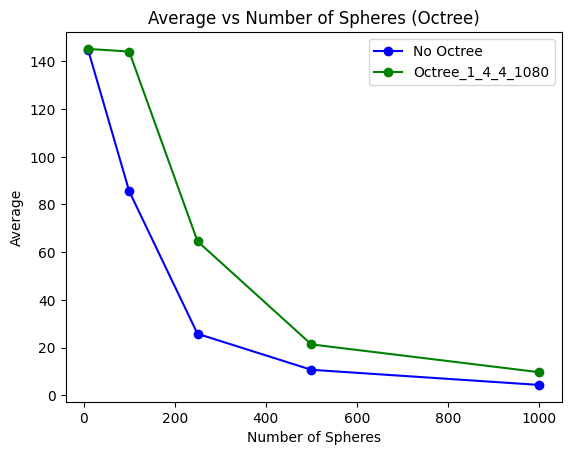

In [18]:
avg_by_spheres = naive_4_4_1080.groupby('Spheres')['Avg FPS'].mean().reset_index()
avg_by_spheres_octree_1_4_4_1080 = octree_1_4_4_1080.groupby('Spheres')['Avg FPS'].mean().reset_index()

plt.plot(avg_by_spheres['Spheres'], avg_by_spheres['Avg FPS'], marker='o', label='No Octree', color='blue')
plt.plot(avg_by_spheres_octree_1_4_4_1080['Spheres'], avg_by_spheres_octree_1_4_4_1080['Avg FPS'], marker='o', label='Octree_1_4_4_1080', color='green')

plt.xlabel('Number of Spheres')
plt.ylabel('Average')
plt.title('Average vs Number of Spheres (Octree)')
plt.legend()
plt.show()


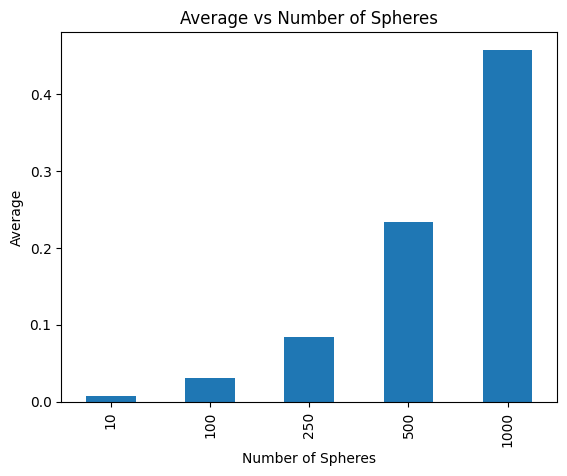

In [19]:
df.groupby('Spheres')['Avg'].mean().plot(kind='bar')
plt.xlabel('Number of Spheres')
plt.ylabel('Average')
plt.title('Average vs Number of Spheres')
plt.show()

<Figure size 1200x800 with 0 Axes>

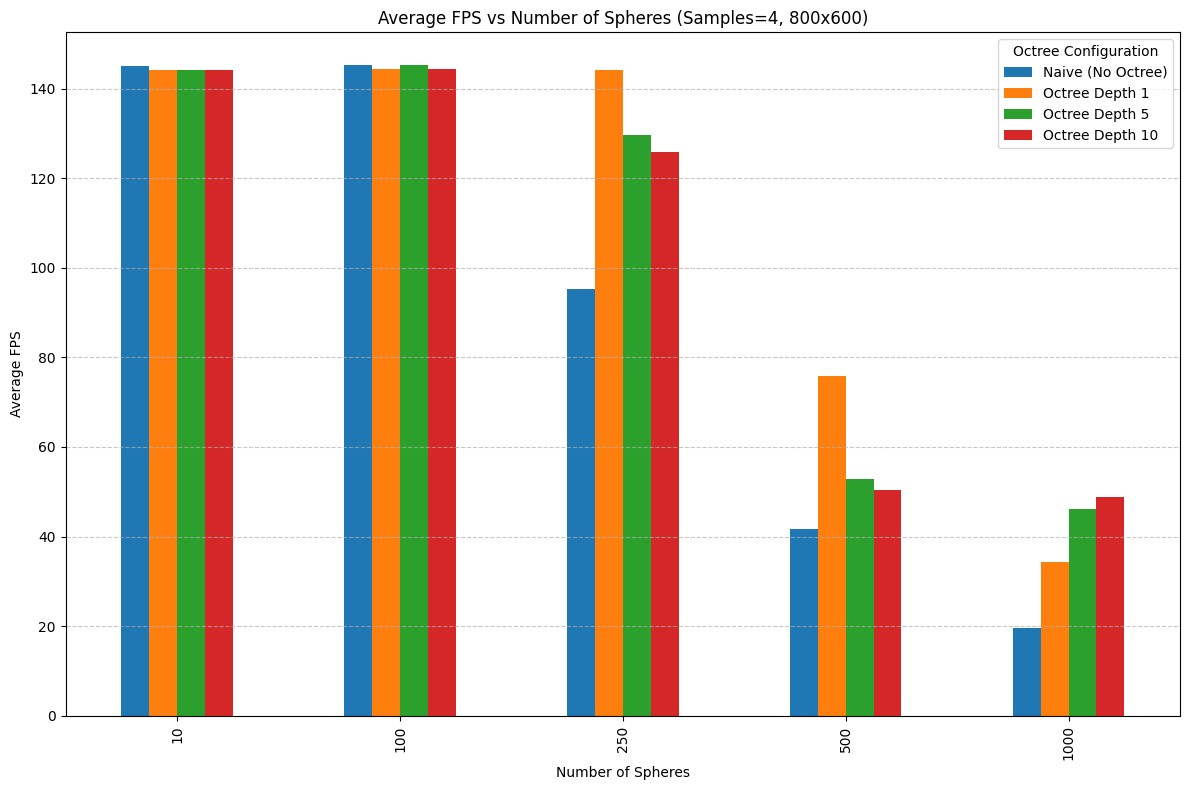

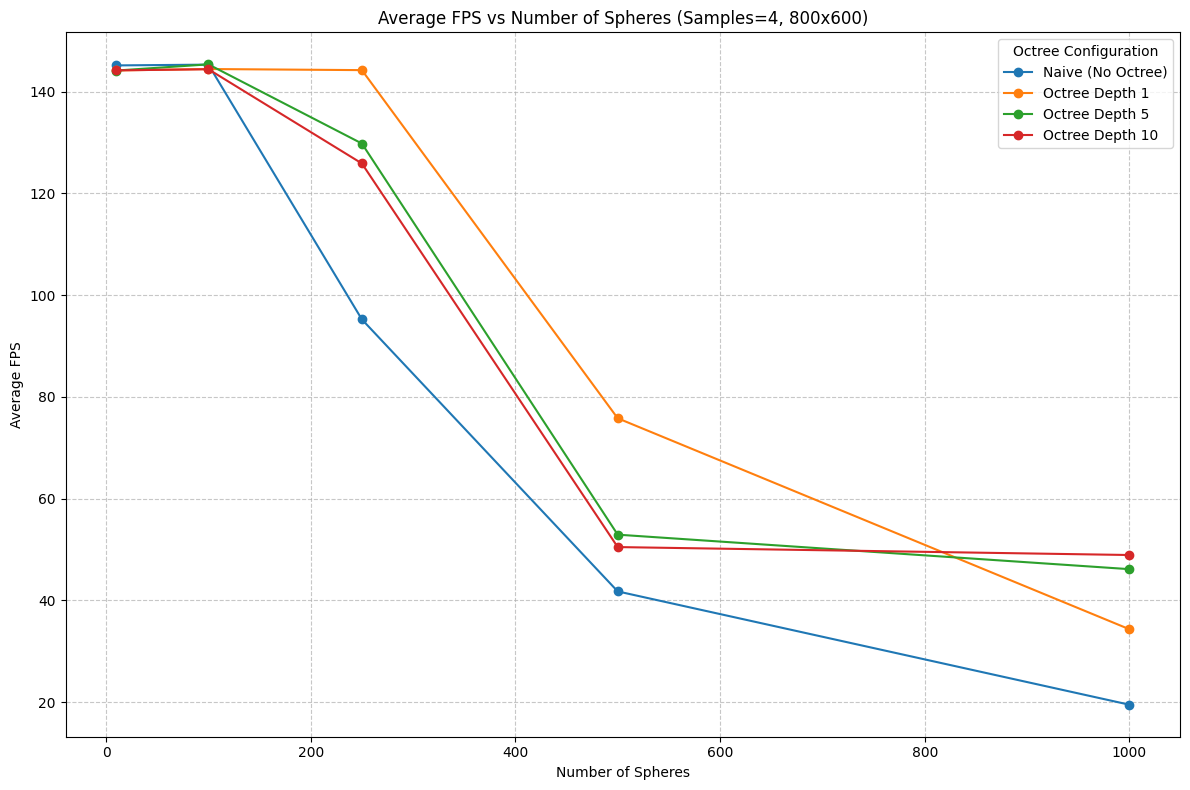

In [ ]:
# Filter data for specific configuration (samples = 4, height = 600)
df_filtered = df[df['Num Samples'] == 4]
df_filtered = df_filtered[df_filtered['Screen Height'] == 600]

# Get unique sphere counts for the filtered data
sphere_counts = sorted(df_filtered['Spheres'].unique())

# Filter data for different octree depths
naive = df_filtered[df_filtered['Max Octree Depth'] == -1]  # Naive method (no octree)
depth_1 = df_filtered[(df_filtered['Uses Octree'] == 1) & (df_filtered['Max Octree Depth'] == 1)]
depth_5 = df_filtered[(df_filtered['Uses Octree'] == 1) & (df_filtered['Max Octree Depth'] == 5)]
depth_10 = df_filtered[(df_filtered['Uses Octree'] == 1) & (df_filtered['Max Octree Depth'] == 10)]

# Create DataFrame with the results
avg_fps_data = pd.DataFrame({
    'Spheres': sphere_counts,
    'Naive (No Octree)': [naive[naive['Spheres'] == spheres]['Avg FPS'].mean() for spheres in sphere_counts],
    'Octree Depth 1': [depth_1[depth_1['Spheres'] == spheres]['Avg FPS'].mean() for spheres in sphere_counts],
    'Octree Depth 5': [depth_5[depth_5['Spheres'] == spheres]['Avg FPS'].mean() for spheres in sphere_counts],
    'Octree Depth 10': [depth_10[depth_10['Spheres'] == spheres]['Avg FPS'].mean() for spheres in sphere_counts]
})

# Plot the results as a bar chart
plt.figure(figsize=(12, 8))
avg_fps_data.set_index('Spheres').plot(kind='bar', figsize=(12, 8))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (LQ, 800x600)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Octree Configuration')
plt.tight_layout()
plt.show()

# Also create a line plot for better trend visualization
plt.figure(figsize=(12, 8))
for column in avg_fps_data.columns:
    if column != 'Spheres':
        plt.plot(avg_fps_data['Spheres'], avg_fps_data[column], marker='o', label=column)
        
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (LQ, 800x600)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Octree Configuration')
plt.tight_layout()
plt.show()